# TASCA M9 T01
Exercicis d'anàlisi de sentiment i textos.

# > Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
#Loading NLTK
import nltk
#nltk.download('punkt')

In [2]:
from nltk.tokenize import sent_tokenize
text = """Franciscan friar William of Baskerville and his novice, Adso of Melk, arrive at an early 14th century
Benedictine abbey in Northern Italy. A mysterious death has occurred ahead of an important theological Church conference.
William, known for his deductive and analytical mind, confronts the worried Abbot and gains permission to investigate the death:
a young illuminator appears to have committed suicide."""
tokenizedText=sent_tokenize(text)
tokenizedText

['Franciscan friar William of Baskerville and his novice, Adso of Melk, arrive at an early 14th century\nBenedictine abbey in Northern Italy.',
 'A mysterious death has occurred ahead of an important theological Church conference.',
 'William, known for his deductive and analytical mind, confronts the worried Abbot and gains permission to investigate the death:\na young illuminator appears to have committed suicide.']

In [3]:
from nltk.tokenize import word_tokenize
tokenizedWord=word_tokenize(text)
print(tokenizedWord)

['Franciscan', 'friar', 'William', 'of', 'Baskerville', 'and', 'his', 'novice', ',', 'Adso', 'of', 'Melk', ',', 'arrive', 'at', 'an', 'early', '14th', 'century', 'Benedictine', 'abbey', 'in', 'Northern', 'Italy', '.', 'A', 'mysterious', 'death', 'has', 'occurred', 'ahead', 'of', 'an', 'important', 'theological', 'Church', 'conference', '.', 'William', ',', 'known', 'for', 'his', 'deductive', 'and', 'analytical', 'mind', ',', 'confronts', 'the', 'worried', 'Abbot', 'and', 'gains', 'permission', 'to', 'investigate', 'the', 'death', ':', 'a', 'young', 'illuminator', 'appears', 'to', 'have', 'committed', 'suicide', '.']


In [4]:
from nltk.probability import FreqDist

fDist = FreqDist(tokenizedWord)
print(fDist)

<FreqDist with 54 samples and 69 outcomes>


In [5]:
fWord = fDist.most_common()   
print(fWord)

[(',', 4), ('of', 3), ('and', 3), ('.', 3), ('William', 2), ('his', 2), ('an', 2), ('death', 2), ('the', 2), ('to', 2), ('Franciscan', 1), ('friar', 1), ('Baskerville', 1), ('novice', 1), ('Adso', 1), ('Melk', 1), ('arrive', 1), ('at', 1), ('early', 1), ('14th', 1), ('century', 1), ('Benedictine', 1), ('abbey', 1), ('in', 1), ('Northern', 1), ('Italy', 1), ('A', 1), ('mysterious', 1), ('has', 1), ('occurred', 1), ('ahead', 1), ('important', 1), ('theological', 1), ('Church', 1), ('conference', 1), ('known', 1), ('for', 1), ('deductive', 1), ('analytical', 1), ('mind', 1), ('confronts', 1), ('worried', 1), ('Abbot', 1), ('gains', 1), ('permission', 1), ('investigate', 1), (':', 1), ('a', 1), ('young', 1), ('illuminator', 1), ('appears', 1), ('have', 1), ('committed', 1), ('suicide', 1)]


S'obté tot en ordre de freqüència descendent

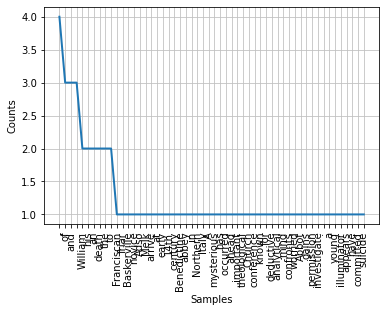

In [6]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fDist.plot(69,cumulative=False)
plt.show()

# > Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

#### a- Eliminació de les stopwords

In [7]:
# Llista de stopwords
from nltk.corpus import stopwords
stopWords=set(stopwords.words("english"))
print(stopWords)

{'own', 'wasn', 'hasn', "won't", "aren't", "hadn't", 'been', 'mightn', 'if', 'weren', 'are', 'themselves', "couldn't", 'for', "you've", 'during', 'from', "didn't", 'down', "shouldn't", 'a', 'not', 'won', 'them', 'again', 'ain', 'ours', 'were', "you'll", 'those', 'had', 'than', 'his', 'd', "weren't", 'your', "wouldn't", 'we', 'that', 'which', 'in', 'above', 'few', "needn't", "shan't", 'after', 'himself', 'hadn', 'because', 'o', 'here', 'to', 'has', 'don', 'who', 'while', 'other', 'whom', "haven't", 'll', 'yourselves', 'can', 'ma', 'hers', "doesn't", 'only', 'nor', 'do', 'what', 'these', 'will', 'doesn', 'haven', "mustn't", 'him', 'at', 'just', "mightn't", 'so', 'be', 'they', 'does', 'between', 'itself', 'up', "don't", 'all', 'being', 'very', "it's", 'until', 'didn', 'where', 'their', "you're", 'out', 'then', 'needn', 'me', 'below', 'aren', 'as', 'its', 'no', 've', "hasn't", 'her', 'into', 'why', 'ourselves', 'herself', 'once', "should've", 'through', 'now', 'myself', "you'd", 'on', 'you

In [8]:
# Eliminació de les stopwords
filteredSent=[]
for w in tokenizedWord:
    if w not in stopWords:
        filteredSent.append(w)
# print("Tokenized sentence:",tokenizedText)
print("Text without stopwords:\n",filteredSent)

Text without stopwords:
 ['Franciscan', 'friar', 'William', 'Baskerville', 'novice', ',', 'Adso', 'Melk', ',', 'arrive', 'early', '14th', 'century', 'Benedictine', 'abbey', 'Northern', 'Italy', '.', 'A', 'mysterious', 'death', 'occurred', 'ahead', 'important', 'theological', 'Church', 'conference', '.', 'William', ',', 'known', 'deductive', 'analytical', 'mind', ',', 'confronts', 'worried', 'Abbot', 'gains', 'permission', 'investigate', 'death', ':', 'young', 'illuminator', 'appears', 'committed', 'suicide', '.']


#### b- Realització de stemming

In [10]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmedWords=[]
for w in filteredSent:
    stemmedWords.append(ps.stem(w))

# print("Text without stopwords:",filteredSent)
print("Stemmed Sentence:\n",stemmedWords)

Stemmed Sentence:
 ['franciscan', 'friar', 'william', 'baskervil', 'novic', ',', 'adso', 'melk', ',', 'arriv', 'earli', '14th', 'centuri', 'benedictin', 'abbey', 'northern', 'itali', '.', 'a', 'mysteri', 'death', 'occur', 'ahead', 'import', 'theolog', 'church', 'confer', '.', 'william', ',', 'known', 'deduct', 'analyt', 'mind', ',', 'confront', 'worri', 'abbot', 'gain', 'permiss', 'investig', 'death', ':', 'young', 'illumin', 'appear', 'commit', 'suicid', '.']


# > Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [12]:
!pip install textblob
from textblob import TextBlob

In [14]:
blob = TextBlob(text)

In [15]:
blob.sentiment

Sentiment(polarity=0.15, subjectivity=0.6749999999999999)

El retorn és una tupla de forma (polaritat, subjetivitat), la polaritat és un valor flotant dins del rang [-1.0, 1.0] (on -1 és molt negatiu, 0 neutre, i 1 positiu) i la subjetivitat és un valor flotant dins del rang [0.0, 1.0] (on 0.0 és molt objetiu i 1.0 és molt subjetiu).

In [20]:
# blob.sentiment.polarity

0.15

In [18]:
# blob.sentiment.subjectivity

0.6749999999999999